# Meta Stock Analysis # 
Yooo welcome!!! The goal of this project is to conduct fundamental and techincal analysis on META stock to determine optimal prices to buy and sell stock. 
The reason why I'm deciding to do this is because I ended up buying a few shares of META 6 months ago without much research and analysis. Turns out that was a bad idea and the stock has lost more than half its value since then. So this is kind of redemption for me heheh, I am definitly not a qualified investor but am excited to learn through this project!

-- This Project is going to be broken down into a 3 sections: --

# Part 1: Fundamental Analysis #

We'll start off with some fundamental analysis on META stock to determine it's intrinsic value, which is really just finding out how much the company is worth. The goal of this is to figure out what the "fair market value" of META is compared to how the market is pricing it's value. In this case, META is undervalued if from our analysis we determine that its overall value is greater than what the stock market deems so. 
    
~ I'll also add here some financial jargon that I got from investopedia:
    
The primary assumption with fundamental analysis is that the current price of a stock does not fully reflect the value of a company when compared to publicly available financial data
    
So how are we actually going to do this?
    
Stock fundamental analysis can involve both quantitative and qualitative measures. There are financial statements, ratios, and macroeconomic statistics we can analyze on the quantitative side while there is leadership, consumer sentiment on the qualitative side. 
    
### Part 2: Technical Analysis ###
The next step is going to be doing technical analysis on META stock. Technical analysis is just the process of looking at a securitie's(financial product/stock) historical price and try to make future predictions based off that. Really the underlying goal here is to understand the market sentiment behind price trends by looking for patterns rather than analyzing a stock's fundamental attributes. 

There are hundreds of patterns and signals used across the finance industry to make trades based of price movements. In general, technical analysis look at the following broad types of indicators which will be analyzed in this project:

    -Price trends
    -Momentum
    -Moving averages



### Part 3: Summary/Rating ###
With our analysis complete we now have a better idea of when to buy and hopefully when to sell. We'll summarize all the techniques we used and the information we learned from it. :D

### Notes ###
Before we dive into to any analysis I want to mention the libraries I'm using to help support this project. For all my financial data I'm making API calls to Financial Modeling Prep 

In [3]:
## JSON Parser provided by FMP ##

try:
    # For Python 3.0 or later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive content of ``url``, parse it as JSON and return the object.
    
    Parameters
    ----------
    url : str
    
    Returns
    -------
    dict
    """
    
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [4]:
import numpy as np
import pandas as pd
from datetime import date 
import requests
from urllib.request import urlopen
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams["figure.figsize"] = (20, 10)

# Part 1: Fundamental Analysis #

## Economic and Industry ##
To kickoff, lets start with analyzing how the state of the economy is doing right now. Just from reading the news there's been a lot of articles about inflation being at an all time high, and a risk of entering a recession within the next year. The S&P index is down about 17% from it's price last year ... things are looking to hot :(

Let's take a look at some economic metrics to see what exactly these headlines are talking about. There are three metrics that we're going to look at: GDP, CPI, and Consumer Sentiment 



In [6]:
## Real GDP ##
real_gdp = get_jsonparsed_data('https://financialmodelingprep.com/api/v4/economic?name=realGDP&from=2011-12-10&to=2022-12-10&apikey=d4277832337026f8e79417143061c25c')
real_gdp.reverse()

## Consumer Price Index ##
cpi = get_jsonparsed_data('https://financialmodelingprep.com/api/v4/economic?name=CPI&from=2011-12-10&to=2022-12-10&apikey=d4277832337026f8e79417143061c25c')
cpi.reverse()

## Consumer Sentiment ##
consumer_sentiment = get_jsonparsed_data('https://financialmodelingprep.com/api/v4/economic?name=consumerSentiment&from=2011-12-10&to=2022-12-10&apikey=d4277832337026f8e79417143061c25c')
consumer_sentiment.reverse()

/tmp/ipykernel_53/266348974.py:26: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


### Gross Domestic Product ###
Gross Domestic Product (GDP) is a comprehensive measure of economic activity in the US that reflects the total value of final goods and services produced in the US. GDP gives us valuable information about the state of the economy and how it is growing.

Note that there are 2 popular ways to measure GDP: Nominal and Real

- Nominal GDP is the assesment of economic activity without considering price increases like underlying inflation
- Real GDP is an assesment of economic acitivty that considers price increases by dividing nominal GDP by a "deflator" that is calculated by the change in price of goods and services from a "base year"

$$ RealGDP = \frac{NominalGDP}{Deflator} $$ 

The graph below shows that fears of recession may not be super convincing yet. Real GDP is pretty healthy in Q3(July - September) but previous quarters have shown signs of decline and leveling off. We should note that after COVID hit in 2020 there's been historic rapid growth in just 2 years, some economists think too rapid.  

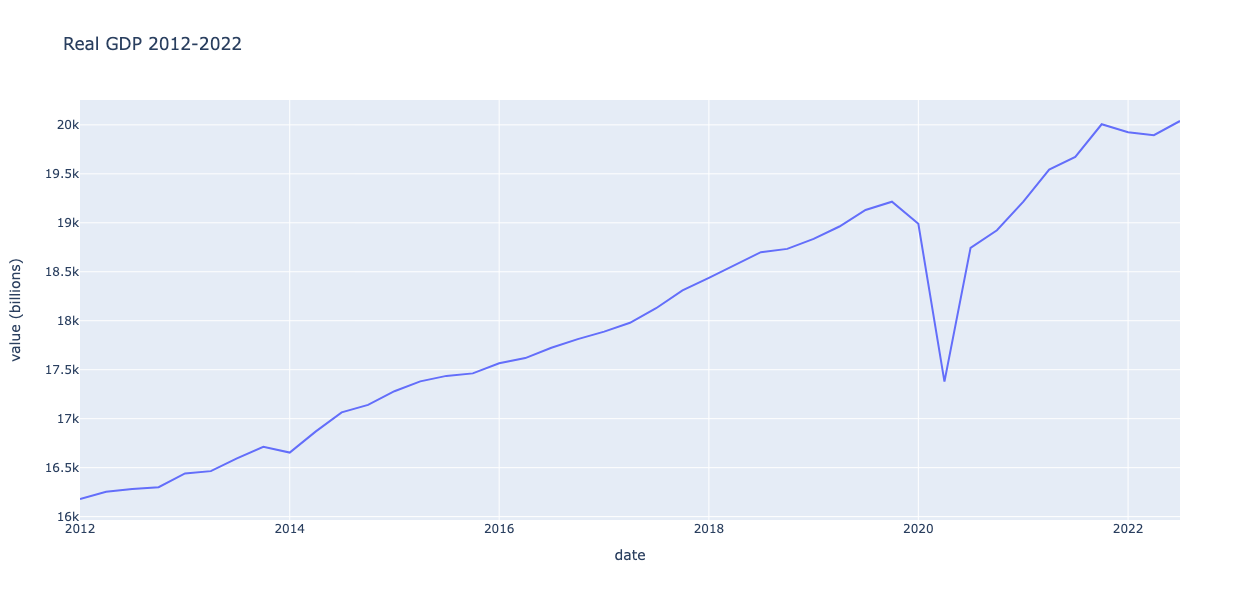

In [7]:
## Real GDP ##
real_gdp_df = pd.DataFrame(real_gdp)
real_gdp_df

labels_dict = {
    'date':'date',
    'value':'value (billions)'
}

fig = px.line(real_gdp_df, x='date', y='value', title='Real GDP 2012-2022', width=1000, height=600, labels=labels_dict)
fig.show()

### Consumer Price Index ###
The Consumer Price Index is a measure of the average change over time in the prices for a market basket of consumer goods and services. The CPI is one of the most popular measures of inflation that is closely followed by policymakers, financial markets, and businesses. 

I found an article on investopedia that describes how the market basket of goods/services work here: https://www.investopedia.com/terms/c/consumerpriceindex.asp
but I'll try my best to summarize it below:
- The Bureau of Labor Statistics (BLS) collects about 93,000 prices monthly from around 23,000 retail and services businesses to create the market basket of goods
- The market basket is calculated with the weighted average of goods and services, with popular goods/services weighted more then less popular ones
- Substitution effects exist when consumers purchase cheaper alternative goods and services when prices rise 
- The Consumer price Index for all Urban Consumers (CPI - U) represents 93% of the US living in urban/suburban locations. This is the basis for all CPI reporting 
- The CPI is updated every month 

How to calculate CPI?
At the most fundamental level, the CPI is calculated by the following formula 
$$ Annual CPI = \frac{Value of Basket In Current Year}{Value of Basket In Previous Year} * 100 $$

To calculate inflation we can use the new CPI and the Prior CPI for our calculations
$$ Inflation Rate = \frac{New CPI - Prior CPI} {Prior CPI} $$

#### Inflation ####
Ok now we know what the CPI is and how to get it, but why does it actually matter? 
It turns out that inflation has a pretty big impact on the economy and the stock market. Heres the idea: if inflation increases that means prices for goods/services are increasing, eventually people won't be able to afford buying more expensive products and will buy less things, leading to a slowdown in spending activity, and slower economic growth. Sounds bad right?

Well... it turns out many economists believe that some inflation is a good thing, and the Federal Reserve (the US central bank that controls our money supply) has a 2% target annual inflation rate based on the Consumer Price index. I honestly don't know how they chose that number and there seems to be a lot of information for and against inflation so I'll leave you with this reading I found that disucsses this topic: https://www.investopedia.com/ask/answers/111414/how-can-inflation-be-good-economy.asp 

#### Interest Rates ####
I mentioned earlier that the Federal Reserve is targeting a 2% annual inflation rate but from the graph it's evident that 

If we compare the graph below to the Real GDP graph above we can see the effects of high inflation on economic output in 2022. There was record high inflation in Q1 and Q2 of 2022 

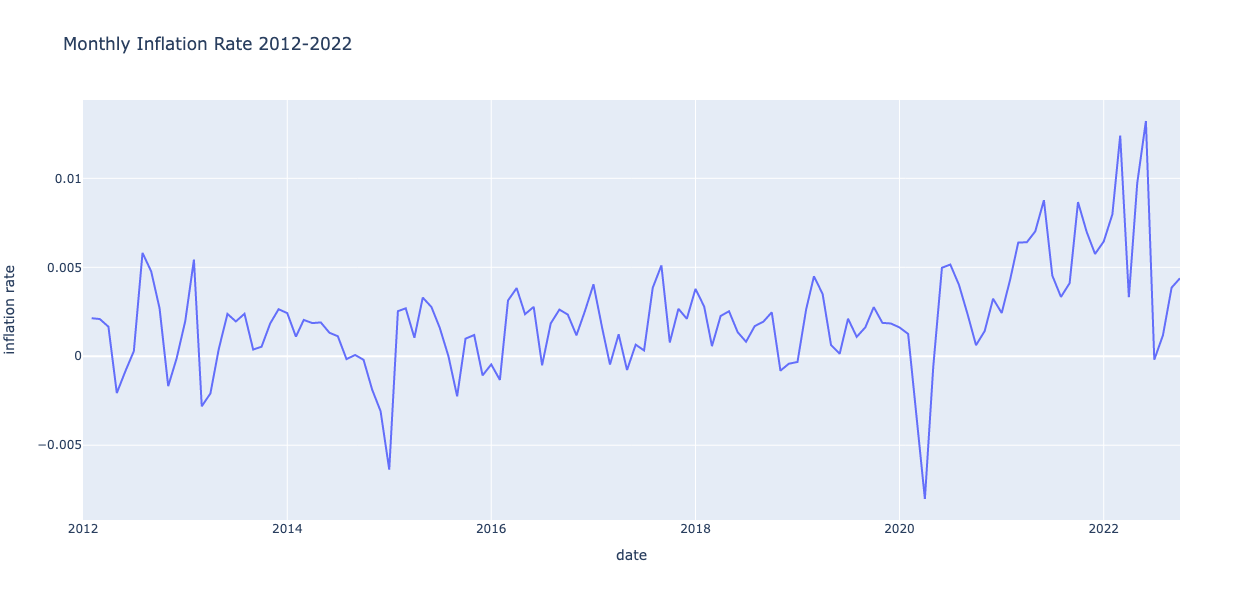

In [8]:
## CPI ##
cpi_df = pd.DataFrame(cpi)

# Calculate Inflation Rate using Inflation Rate Formula #
cpi_df['inflation_rate'] = ((cpi_df.value - cpi_df.value.shift(1)) / cpi_df.value.shift(1))

labels_dict = {
    'date':'date',
    'inflation_rate': 'inflation rate'
}
fig = px.line(cpi_df, x='date', y='inflation_rate', title='Monthly Inflation Rate 2012-2022', width=1000, height=600, labels=labels_dict)
fig.show()

### Consumer Sentiment ###
The final metric that we're going to look at is Consumer Sentiment, which is just how optimistic people feel about their finances and the state of the economy. More details can be found here: http://www.sca.isr.umich.edu/ 

Pretty much, the University of Michigan surveyed a bunch of consumers and created an index from 0 to 100 that measures that optimism about the economy.

After plotting sentiment below its apparent that consumer sentiment is the lowest it's been in the past decade, even lower than COVID times. Comparing this graph the the Real GDP graph there seems to be correlation between the economic growth measured by GDP and the overall consumer sentiment

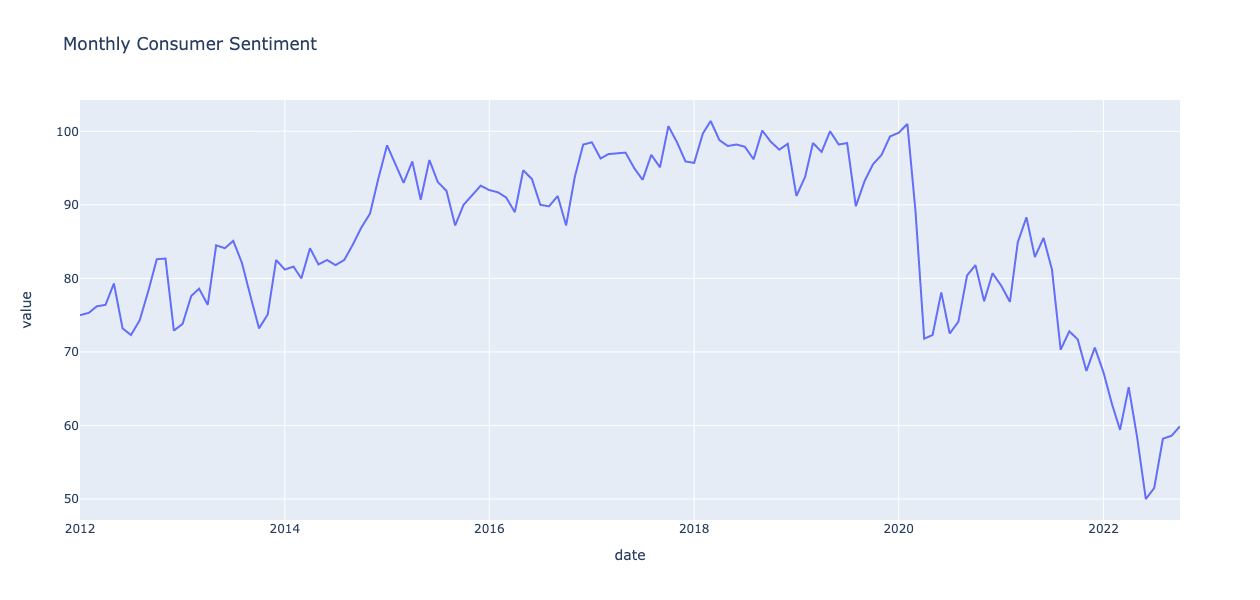

In [9]:
## Consumer Sentiment ##
consumer_sentiment_df = pd.DataFrame(consumer_sentiment)
fig = px.line(consumer_sentiment_df, x='date', y='value',title='Monthly Consumer Sentiment', width=1000, height=600,labels=labels_dict)

fig.show()

### Checkpoint ###
This is only the beginning of our analysis, we haven't even touched anything META related, but its really important that now we have a basic idea of the current state of the economy is in. Inflationary pressures, War in Europe, and many other factors that we haven't even touched upon are threatening the market. In the next step let's see how META is positined in all of this? 

## Meta Overview ##
You've probably heard of META right? Used to be called Facebook, and owns some of the top social media platforms like WhatsApp, Instagram, and Facebook. In 2021 the Facebook decided to change it's name to META and put hella resources towards VR and AR technology in their Readlity Labs Division. Today the company opeartes in two segments. The Family of Apps(Instagram, Facebook, WhatsApp) and Reality Labs(VR, AR, Metaverse)

#### Business Model ####
The Core Business Model of Meta Platforms revolves around advertising among it's Family of Apps. While it is trying to expand its Virtual Reality presence almost 90% of META's revenue is from advertising. Historically Meta has been active in Mergers & Aquistions, aquiring well-known businesses today like WhatsApp, Instagram, and Oculus. 

#### Legal Troubles ####
Meta has had it's fair share of legal problems over the past decade. In 2020 the Federal Trade Commission launched an antitrust lawsuit against Meta alleging that Meta holds monopolistic power in the US social netowrking market. There have also been countless lawsuits against Meta on violating privacy laws in the US and other countries. There's a few videos of Mark Zuckerburg floating around testifying in Congress in a 2018 Congressional hearing describing how Meta is taking steps to protect privacy. Since hearing, Meta still has problems with privacy, and misinformation lol.

- wiki: https://en.wikipedia.org/wiki/Lawsuits_involving_Meta_Platforms
- hearing: https://www.youtube.com/watch?v=EgI_KAkSyCw&ab_channel=CNET

~ In one of Max's lecture recently we talked about some of the ethical issues that Meta has faced in the pass, specifically Facebook's faciliation of a genocide in Myanmar which is really fucked up. Apparently the government was creating sham accounts to spread propoganda against muslims to help fuel their motivations.
Read about it here: https://www.nytimes.com/2018/10/15/technology/myanmar-facebook-genocide.html
The ethics of Facebook, and social media as a whole are questionable, especially when it comes to mental health. As an investor, it's up to you to decide whether you want to invest in a certain type of company. 

#### Recent Events ####
Before we dive deeper into some fundamental analysis I'll make it clear that META right now isn't doing so hot. Reality Labs is bleeding money and many investors believe this pivot towards the Metaverse is a mistake. Since the beginning of the year META's stock price has declined more than 50% and reached under $100 in October, the lowest it's been in the past 5 years. This is just surface level news headlines, let's see whats really happening behind the scenes!



In [10]:
overview = get_jsonparsed_data('https://financialmodelingprep.com/api/v3/profile/META?apikey=d4277832337026f8e79417143061c25c')
print(overview)

peers = get_jsonparsed_data('https://financialmodelingprep.com/api/v4/stock_peers?symbol=META&apikey=d4277832337026f8e79417143061c25c')
peers

[{'symbol': 'META', 'price': 116.65, 'beta': 1.204382, 'volAvg': 45846546, 'mktCap': 262307349901, 'lastDiv': 0.0, 'range': '88.09-352.71', 'changes': 1.32, 'companyName': 'Meta Platforms, Inc.', 'currency': 'USD', 'cik': '0001326801', 'isin': 'US30303M1027', 'cusip': '30303M102', 'exchange': 'NASDAQ Global Market', 'exchangeShortName': 'NASDAQ', 'industry': 'Internet Content & Information', 'website': 'https://investor.fb.com', 'description': "Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messag

/tmp/ipykernel_53/266348974.py:26: DeprecationWarning:

cafile, capath and cadefault are deprecated, use a custom context instead.



[{'symbol': 'META',
  'peersList': ['CMCSA',
   'TMUS',
   'NFLX',
   'CHTR',
   'NTES',
   'ATVI',
   'VOD',
   'WBD',
   'BIDU',
   'EA']}]

## Financial Statements ##
Let's start by analyzing microeconomic factors related to META and it's underlying business. The industry standard way to go about this is to analyze a company's three core financial statements:
1. Income Statement (Company performance over time)
2. Balance Sheet (Snapshot of Company's value at one time)
3. Cash Flow Statement (Flow of cash in Company over time) 

Each statement will provide us with important information about META to help us with our analysis. Three of the most important techniques when analyzing these financial statements are as follows:
1. Horizontal Analysis - comparing data horizontally across time
2. Vertical Analysis - comparing data vertically at one point in time to see effects on different aspects of business
3. Ratio Analysis - use ratio metrics to caluclate statistical analysis

We will use the data we get from the these statements to evaluate META's intrinsic value, performance, and compare it with other companies in the same/similar industries and the stock market as a whole. Let's GOoooOOO :D  

In [11]:
#### Getting Financial Statement Data from FMP API ####

## Annual Data ##
balance_sheet_annual = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/balance-sheet-statement/META?&limit=10&apikey=d4277832337026f8e79417143061c25c")
income_statement_annual = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/income-statement/META?&limit=10&apikey=d4277832337026f8e79417143061c25c")
cash_statement_annual = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/cash-flow-statement/META?&limit=10&apikey=d4277832337026f8e79417143061c25c")
## Quarterly Data ##
balance_sheet_quarter = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/balance-sheet-statement/META?&period=quarter&limit=15&apikey=d4277832337026f8e79417143061c25c")
income_statement_quarter = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/income-statement/META?&period=quarter&limit=15&apikey=d4277832337026f8e79417143061c25c")
cash_statement_quarter = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/cash-flow-statement/META?&period=quarter&limit=15&apikey=d4277832337026f8e79417143061c25c")

balance_sheet_annual_as_reported = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/balance-sheet-statement-as-reported/META?&apikey=d4277832337026f8e79417143061c25c")
## Daily Pricing data
price = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/historical-price-full/META?from=2012-12-31&to=2022-12-7&apikey=d4277832337026f8e79417143061c25c")

balance_sheet_annual.reverse()
income_statement_annual.reverse()
cash_statement_annual.reverse()
balance_sheet_quarter.reverse()
income_statement_quarter.reverse()
cash_statement_quarter.reverse()

/tmp/ipykernel_53/266348974.py:26: DeprecationWarning:

cafile, capath and cadefault are deprecated, use a custom context instead.



## Balance Sheet ##
The first statement we are going to examine is the balance sheet, a statement that is structured into Assets, Liabilities, and Shareholder Equity. This idea of assets, liabilites, and shareholders Equity is one of the fundamental concepts of accouting, according to my accounting professor, shoutout Prof. Bassu and McMillan. Here's some quick definitions:
- Assets: What the company owns
- Liabilities: What the company owes
- Shareholder Equity: What the company owns - What the company owes

These definitions lead to the fundamental accounting equation

$$ Assets = Liabilities + Shareholders Equity $$

**Ok but what does this mean and why do we care?**
Well, it turns out that investors like Warren Buffet really really care about something called **Book Value** which is the net value of a firm's assets found on its balance sheet, meaning **assets - liabilites** which is actaully just the **shareholders equity**. Another way to think of **Book Value** is the money that investors would get if META was to sell everything it owned today and paid off its debts. A mathmatical formula follows:

$$Book Value = Total Assets - Total Liabilities$$

In [12]:
## balance sheet data
balance_sheet_df_quarter = pd.DataFrame(balance_sheet_quarter)
balance_sheet_df_annual = pd.DataFrame(balance_sheet_annual)
balance_sheet_df_annual_as_reported = pd.DataFrame(balance_sheet_annual_as_reported)
balance_sheet_df_annual_as_reported


date symbol period   liabilities  additionalpaidincapital  \
0  2021-12-31   META     FY  4.110800e+10             5.581100e+10   
1  2020-12-31   META     FY  3.102600e+10                      NaN   
2  2019-12-31   META     FY  3.232200e+10             4.585100e+10   
3  2018-12-31   META     FY  1.320700e+10             4.290600e+10   
4  2017-12-31   META     FY  1.017700e+10             4.058400e+10   
5  2016-12-31   META     FY  5.767000e+09             3.822700e+10   

   accountspayabletradecurrent  prepaidexpenseandotherassetscurrent  \
0                 4.083000e+09                         4.629000e+09   
1                 1.093000e+09                                  NaN   
2                 8.860000e+08                         1.852000e+09   
3                          NaN                         1.779000e+09   
4                          NaN                         1.020000e+09   
5                          NaN                         9.590000e+08   

   liabilitiesandstockholdersequity  commonstocksharesauthorized  \
0                      1.659870e+11                 5.000000e+09   
1                      1.593160e+11                 5.000000e+09   
2                      1.333760e+11                 5.000000e+09   
3                      9.733400e+10                 5.000000e+09   
4                      8.452400e+10                 5.000000e+09   
5                      6.496100e+10                 5.000000e+09   

   cashandcashequivalentsatcarryingvalue  ...  \
0                           1.660100e+10  ...   
1                           1.757600e+10  ...   
2                           1.907900e+10  ...   
3                           1.001900e+10  ...   
4                           8.079000e+09  ...   
5                           8.903000e+09  ...   

   contractwithcustomerliabilitycurrent  accountspayablecurrent  \
0                                   NaN                     NaN   
1                           382000000.0            1.331000e+09   
2                           269000000.0            1.363000e+09   
3                           147000000.0            8.200000e+08   
4                                   NaN            3.800000e+08   
5                                   NaN            3.020000e+08   

   allowancefordoubtfulaccountsreceivablecurrent  accruedliabilitiescurrent  \
0                                            NaN                        NaN   
1                                    114000000.0                        NaN   
2                                    206000000.0               1.173500e+10   
3                                    229000000.0               5.509000e+09   
4                                    189000000.0               2.892000e+09   
5                                     94000000.0               2.203000e+09   

   propertyplantandequipmentnet  marketablesecuritiescurrent  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                  2.468300e+10                          NaN   
4                  1.372100e+10                 3.363200e+10   
5                  8.591000e+09                 2.054600e+10   

   deferredrevenueandcreditscurrent  outstandingsharessubjecttorepurchase  \
0                               NaN                                   NaN   
1                               NaN                                   NaN   
2                               NaN                                   NaN   
3                               NaN                                   NaN   
4                        98000000.0                                   NaN   
5                        90000000.0                             4000000.0   

   capitalleaseobligationscurrent  capitalleaseobligationsnoncurrent  
0                             NaN                                NaN  
1                             NaN           

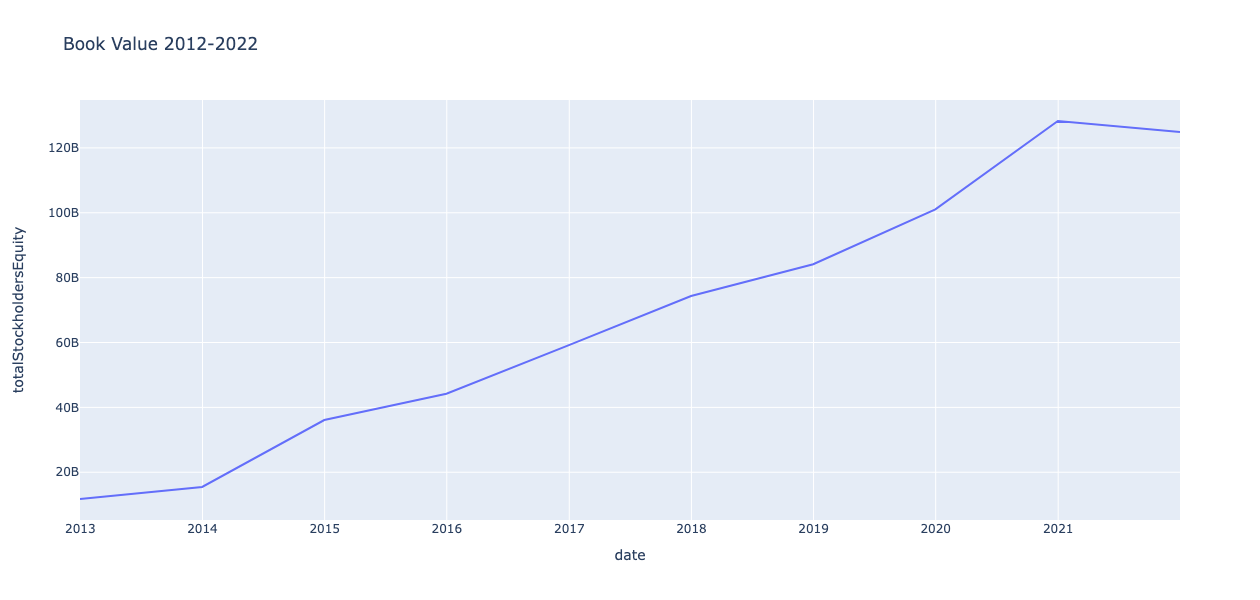

In [13]:
## Annual Book Value
fig = px.line(balance_sheet_df_annual, x='date', y='totalStockholdersEquity', title='Book Value 2012-2022', width=1000, height=600)
fig.show()

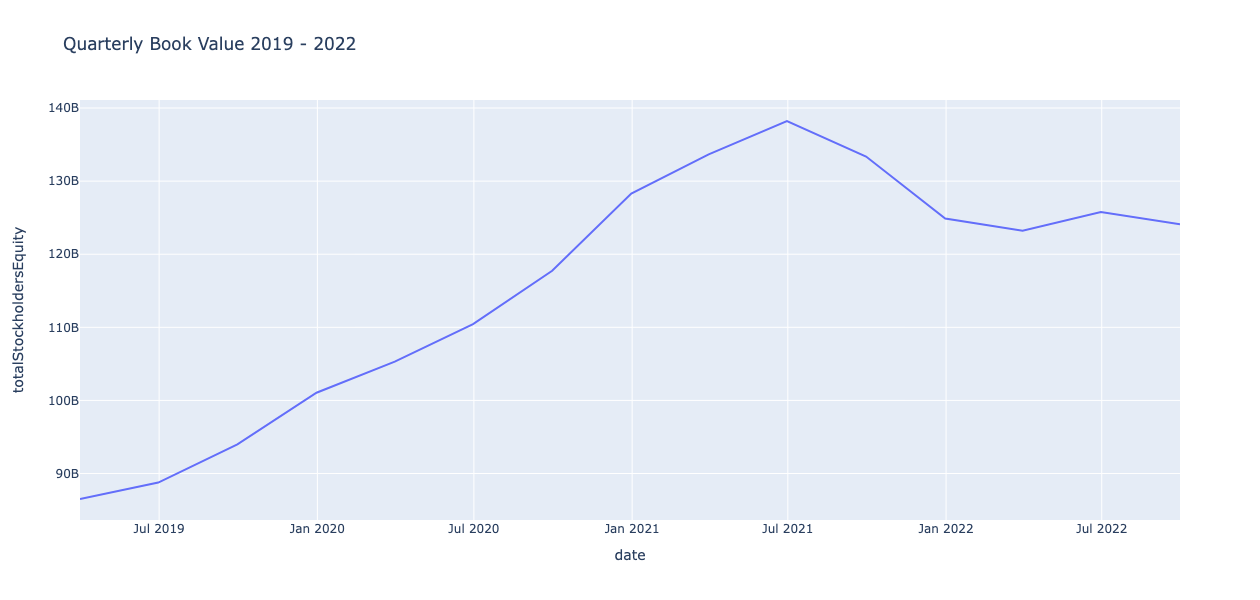

In [14]:
## Quarterly Book Value
fig = px.line(balance_sheet_df_quarter, x='date', y='totalStockholdersEquity', title = 'Quarterly Book Value 2019 - 2022', width = 1000, height = 600)
fig.show()

A company's book value is helpful for investors to determine if the company is currently undervalued by comparing it's book value per share to its market value per share(the current stock price). This makes sense right? The book value is how much the company is worth on the balance sheet which is grounded with regulated accouting principles versus the market value which has little fundamental grounding. To calculate book value per share we can do:
$$ Book Value Per Share  = \frac{Book Value}{Total Shares Outstanding} $$

Note about the formula: Total Shares outstanding just means the amount of stock that is being issued by the company, luckily this can be found in a company's balance sheet!

Once we have META's Book Value Per Share let's compare it with the Market Value Per Share to see how the market is currently pricing it's book value. Investors use a ratio called price to book ratio like so:
$$ Price To Book Ratio = \frac{Market Value Per Share}{Book Value Per Share} $$

**Note** for some reason FMP doesn't have common stock outstanding on its Balance Sheet API so let's try scraping the web for that information.
Found a website that has the relevant information: https://www.macrotrends.net/stocks/charts/META/meta-platforms/shares-outstanding

In [15]:
## Scrape Shares Outstanding from the Web ##
from bs4 import BeautifulSoup
import requests

page = requests.get("https://www.macrotrends.net/stocks/charts/META/meta-platforms/shares-outstanding")
soup = BeautifulSoup(page.content, 'html.parser')      

# Create dataframe
shares_outstanding = soup.find('table')        #find table html tag
shares_outstanding_df = pd.read_html(str(shares_outstanding))[0]

# Modify dataframe 
shares_outstanding_df.columns = ['year', 'shares_outstanding']
shares_outstanding_df = shares_outstanding_df.truncate(after=9, axis=0)
shares_outstanding_df = shares_outstanding_df[::-1] # reverse order
shares_outstanding_df['shares_outstanding'] = shares_outstanding_df['shares_outstanding'] * 1000000
shares_outstanding_df

year  shares_outstanding
9  2012          2166000000
8  2013          2517000000
7  2014          2664000000
6  2015          2853000000
5  2016          2925000000
4  2017          2956000000
3  2018          2921000000
2  2019          2876000000
1  2020          2888000000
0  2021          2859000000

In [16]:
##Price to Book Value calculations

book_value_df = pd.DataFrame(balance_sheet_df_annual['date'])
book_value_df['book_value'] = balance_sheet_df_annual['totalStockholdersEquity']
dates = str(book_value_df['date'])

# create list of price data, not that I manually insert the prices for 2016 and 2017 because markets were closed
# these prices are the closing price for the day
pricing = [round(date['close'], 2) for date in price['historical'] if date['date'] in dates]
#index 4 = 2016 index 5 = 2017
## 2017 Dec 28 176.46 2016 Dec 30 115.05
pricing.reverse()
pricing.insert(4, 115.05)
pricing.insert(5, 176.46)

# book value calculations
book_value_df['market_value_per_share'] = pricing
book_value_df['book_value_per_share'] = book_value_df['book_value'] / shares_outstanding_df['shares_outstanding']
book_value_df['price_to_book_ratio'] = book_value_df['market_value_per_share'] / book_value_df['book_value_per_share']
book_value_df
# price['historical']

date    book_value  market_value_per_share  book_value_per_share  \
0  2012-12-31   11755000000                   26.62              4.111577   
1  2013-12-31   15470000000                   54.65              5.356648   
2  2014-12-31   36096000000                   78.02             12.550765   
3  2015-12-31   44218000000                  104.66             15.137966   
4  2016-12-31   59194000000                  115.05             20.025034   
5  2017-12-31   74347000000                  176.46             25.417778   
6  2018-12-31   84127000000                  131.09             29.487206   
7  2019-12-31  101054000000                  205.25             37.933183   
8  2020-12-31  128290000000                  273.16             50.969408   
9  2021-12-31  124879000000                  336.35             57.654201   

   price_to_book_ratio  
0             6.474401  
1            10.202275  
2             6.216354  
3             6.913742  
4             5.745309  
5             6.942385  
6             4.445657  
7             5.410830  
8             5.359293  
9             5.833920

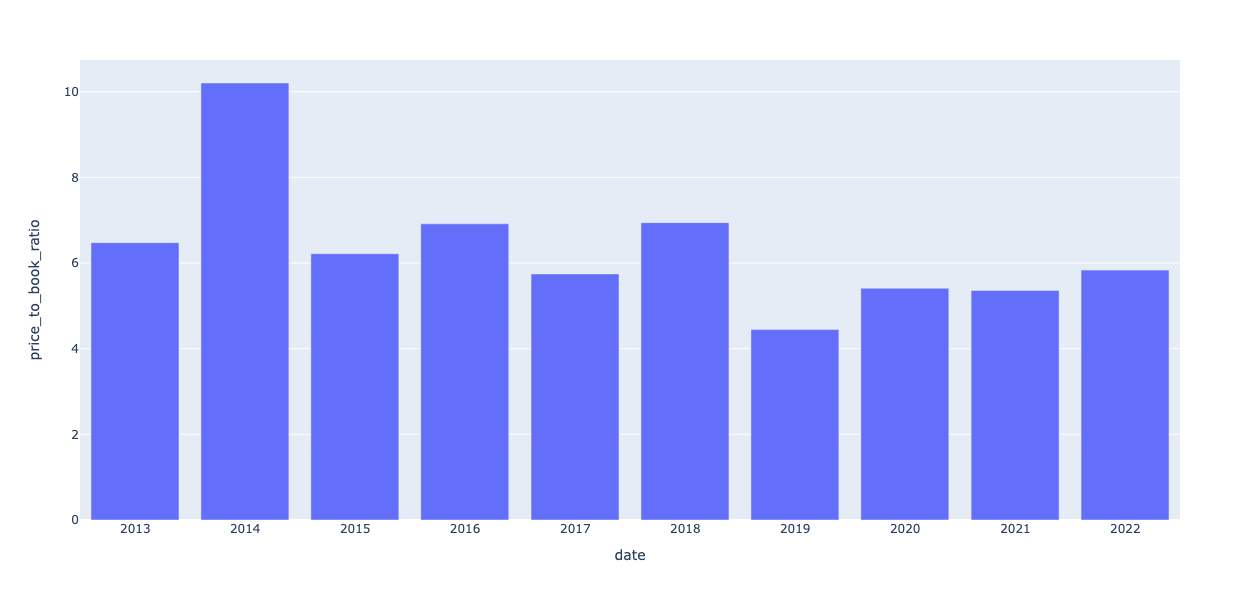

In [20]:
fig = px.bar(book_value_df, x = 'date', y = 'price_to_book_ratio', width = 1000, height = 600)
fig.show()

##note that the dates are wrong!!!

Talk about book value analysis

The balance sheet can also help us analyze **Gearing Ratios** which are financial ratios that compare some form of owner's equity to debt. **Gearing** is a measurement of a company's fianancial **leverage**. Think of **leverge** as a company borrowing money, so essentially it's debt. These **Gearing Ratios** are helpful to understand how much of META is being financed with debt and how much is being financed with equity(stock, retained earnings)

An industry standard ratio is **Debt to Equity Ratio** that compares debt and equity to assess how much a company relies on debt to run its operations.
$$DebtToEquityRatio = \frac{TotalLiabilities}{TotalShareholders'Equity}$$

Let's use this to analyze META's capital structure

In [21]:
df = pd.DataFrame(balance_sheet_df_annual['date'])
df['debt_to_equity_ratio'] = balance_sheet_df_annual['totalLiabilities'] / balance_sheet_df_annual['totalStockholdersEquity']
df

date  debt_to_equity_ratio
0  2012-12-31              0.284815
1  2013-12-31              0.156755
2  2014-12-31              0.113254
3  2015-12-31              0.117350
4  2016-12-31              0.097425
5  2017-12-31              0.136885
6  2018-12-31              0.156989
7  2019-12-31              0.319849
8  2020-12-31              0.241843
9  2021-12-31              0.329183

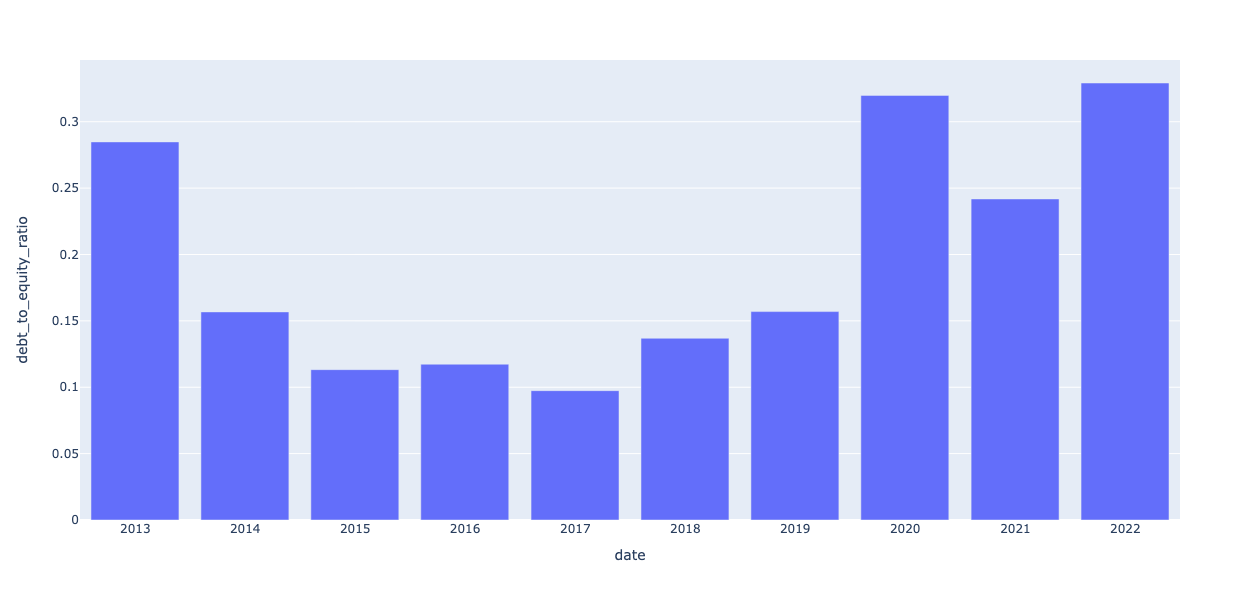

In [22]:
fig = px.bar(df, x='date',y='debt_to_equity_ratio', width = 1000, height = 600)
fig.show()

##labels are wrong again!!!

For the past 10 years META has consistently had a Debt to Equity ratio lower than 1, meaning that it financed more than half of it's operations through non-debt obligations, like issuing new stock or using retained earnings. Having a low ratio can indicate that an investment in META is less risky because what the company owns is greater than what it owes. 

## Income Statement ##
The next financial statement we are going to look at is the Income Statement. Previously we examined the balance sheet that showed us a snapshot of the company at one point in time. The income statement will show us how well the company is doing over time. At it's core, an income statement can be broken into three pieces:

1. Income: How much the company is making
2. Expenses: How much the company is Spending
3. Earnings: Gains or Losses of the company

In our analysis of Meta lets start by analyzing it's income in the past 10 years and the past 10 quarters

In [23]:
income_statement_df_annual = pd.DataFrame(income_statement_annual)
income_statement_df_quarter = pd.DataFrame(income_statement_quarter)

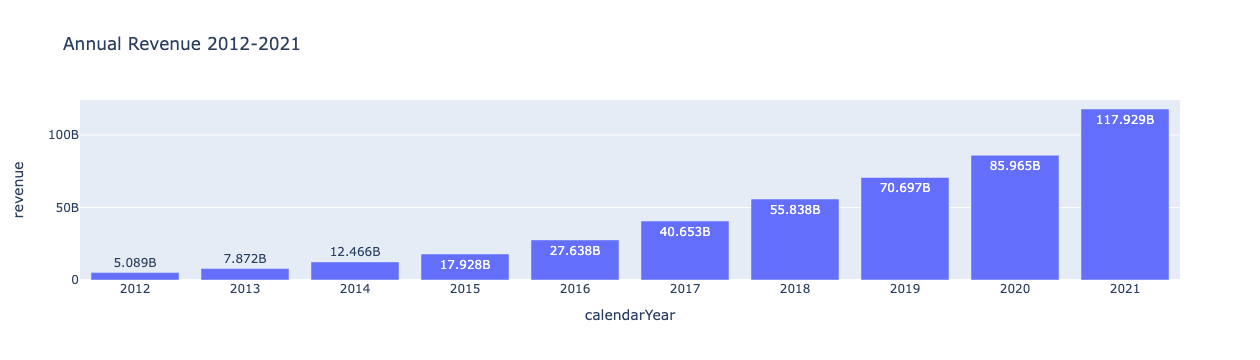

In [24]:
## Annual Revenue
fig = px.bar(income_statement_df_annual, x='calendarYear', y='revenue', title="Annual Revenue 2012-2021", text_auto=True)
fig.show()

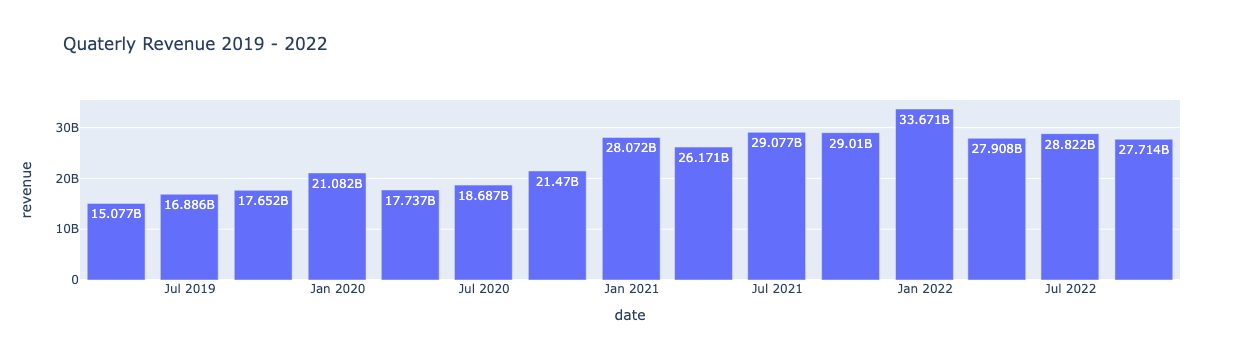

In [25]:
fig = px.bar(income_statement_df_quarter, x='date', y='revenue', title="Quaterly Revenue 2019 - 2022", text_auto=True)
fig.show()

From an annual perspective Meta's revenue looks very healthy with consistent growth year over year. However, the Quarterly data shows that Meta had a drop in revenue for the first time in three years in the 3rd Quarter (July - Sept) of 2022. We can also see a drop in revenue from the 4th Quarter (October - December) last year (2021) and first Quarter (Jan - March) this year (2022) which was when the stock price crashed by more than 25%. Judging by the graph patterns, Meta consistently makes the most sales in the 4th Quarter. 

## Gross Profit ##
**Gross Profit** is an important measure of determining **margin** which is how much money Meta makes after considering how much it spends on it's core business proudcts/services (**Cost Of Revenue**). For Meta, some expenses they may incur to produce their family of app services are engineer salaries and engineer salaries. On the reality lab's side any materials and production expenses that goes towards producing VR headsets are included in **Cost of Revenue**

$$ Gross Profit = Revenue - Cost Of Revenue $$

Income Statements should already have calculations of Gross Profit so we can just pull that in using the FMP API

In [36]:
gross_profit_df_annual = pd.DataFrame(income_statement_df_annual['calendarYear'])
gross_profit_df_annual['gross_profit'] = income_statement_df_annual['grossProfit']
gross_profit_df_annual

calendarYear  gross_profit
0         2012    3725000000
1         2013    5997000000
2         2014   10313000000
3         2015   15061000000
4         2016   23849000000
5         2017   35199000000
6         2018   46483000000
7         2019   57927000000
8         2020   69273000000
9         2021   95280000000

In [37]:
gross_profit_df_quarter = pd.DataFrame(income_statement_df_quarter['date'])
gross_profit_df_quarter['gross_profit'] = income_statement_df_quarter['grossProfit']
gross_profit_df_quarter

date  gross_profit
0   2019-03-31   12261000000
1   2019-06-30   13579000000
2   2019-09-30   14497000000
3   2019-12-31   17591000000
4   2020-03-31   14278000000
5   2020-06-30   14858000000
6   2020-09-30   17276000000
7   2020-12-31   22862000000
8   2021-03-31   21040000000
9   2021-06-30   23678000000
10  2021-09-30   23239000000
11  2021-12-31   27323000000
12  2022-03-31   21903000000
13  2022-06-30   23630000000
14  2022-09-30   21998000000

For a more rigerous analysis of **Gross Profit** let's calculate the **Gross Profit Margin** to see how efficient Meta is in allocating it's capital/resources to produce its core products. 
$$ Gross Profit Margin = \frac {Gross Profit}{Revenue} $$

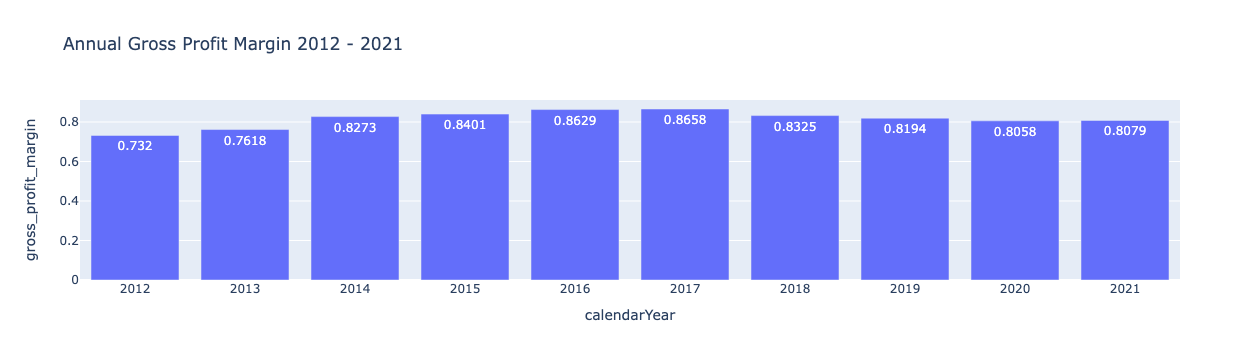

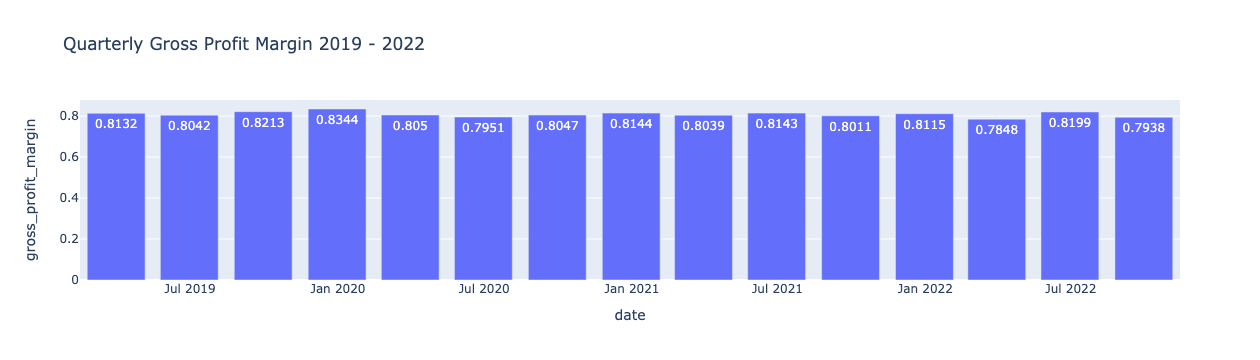

In [48]:
gross_profit_df_annual['gross_profit_margin'] = round(gross_profit_df_annual['gross_profit']/income_statement_df_annual['revenue'], 4)
gross_profit_df_quarter['gross_profit_margin'] = round(gross_profit_df_quarter['gross_profit']/income_statement_df_quarter['revenue'], 4)

fig = px.bar(gross_profit_df_annual, x='calendarYear', y='gross_profit_margin', text_auto=True, title = 'Annual Gross Profit Margin 2012 - 2021')
fig.show()

fig = px.bar(gross_profit_df_quarter, x='date', y='gross_profit_margin', text_auto=True, title = 'Quarterly Gross Profit Margin 2019 - 2022')
fig.show()


In the past 10 years Meta has consistently kept **Gross Margins** Above 70%. We can think of this as for every dollar that Meta makes in revenue by selling it's core products, it will cost less than 30 cents to actually make that product. Meta's primary product is software and the cost of producing software is substantially lower than producing material goods. It's valuable that Gross Margins are high so that Meta can keep as much of their revenue as possible to spend on research, operating, and selling costs.

## Research and Development ##
I made a note before that Meta currently operates in 2 segments, the Family of Apps and Reality Labs. There have been lots of news surrounding the Reality Labs portion of Meta about it bleeding cash for the company. Let's take a look at Meta's research and developtment expenses to see what's really going on.

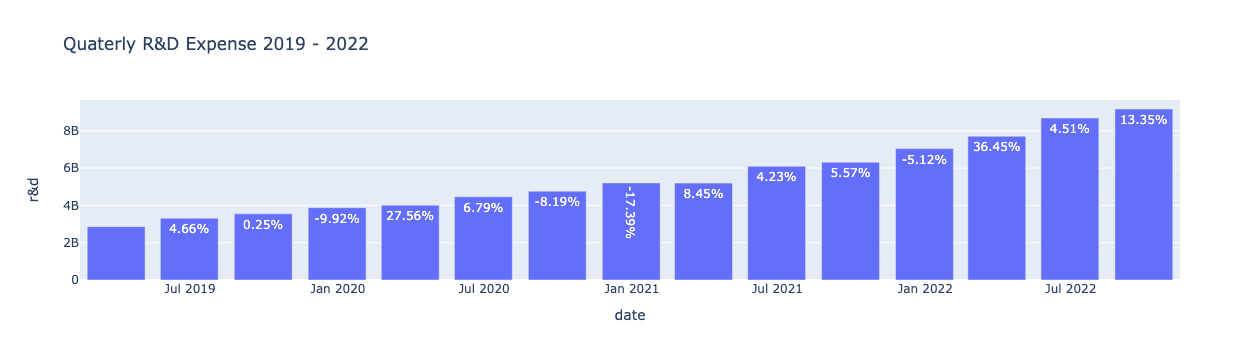

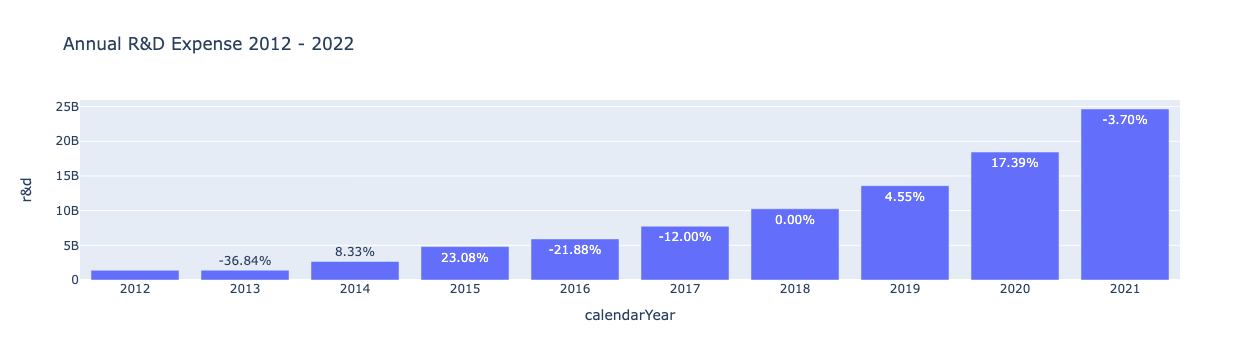

calendarYear          r&d  r&d_gross_profit_ratio r&d_growth
0         2012   1399000000                    0.38       None
1         2013   1415000000                    0.24    -36.84%
2         2014   2666000000                    0.26      8.33%
3         2015   4816000000                    0.32     23.08%
4         2016   5919000000                    0.25    -21.88%
5         2017   7754000000                    0.22    -12.00%
6         2018  10273000000                    0.22      0.00%
7         2019  13600000000                    0.23      4.55%
8         2020  18447000000                    0.27     17.39%
9         2021  24655000000                    0.26     -3.70%

In [73]:
## Quarterly Research and Development Graph
rd_df_quarter = pd.DataFrame(income_statement_df_quarter['date'])
rd_df_quarter['r&d'] = income_statement_df_quarter['researchAndDevelopmentExpenses']

rd_df_quarter['r&d_gross_profit_ratio'] = rd_df_quarter['r&d']/gross_profit_df_quarter['gross_profit']

# Find percent change in r&d gross profit ratio
rd_df_quarter['r&d_growth'] = round((rd_df_quarter['r&d_gross_profit_ratio'] - rd_df_quarter['r&d_gross_profit_ratio'].shift(1)) /  rd_df_quarter['r&d_gross_profit_ratio'].shift(1) * 100, 4)

rd_df_quarter['r&d_growth'] = ["{:.2f}%".format(i) for i in rd_df_quarter['r&d_growth'] ]  #Doing some formatting here to turn floats to percentage
rd_df_quarter.loc[0, 'r&d_growth']= None # Setting the first date percentage growth to none because it is the base 
fig = px.bar(rd_df_quarter, x='date', y='r&d', text='r&d_growth', title = 'Quaterly R&D Expense 2019 - 2022')
fig.show()

## Annual Research and Development Graph
rd_df_annual = pd.DataFrame(income_statement_df_annual['calendarYear'])
rd_df_annual['r&d'] = income_statement_df_annual['researchAndDevelopmentExpenses']

## Get percentage growth in expense compared to base year (2012)
rd_df_annual['r&d_gross_profit_ratio'] = round(rd_df_annual['r&d']/gross_profit_df_annual['gross_profit'], 2)

rd_df_annual['r&d_growth'] = round((rd_df_annual['r&d_gross_profit_ratio'] - rd_df_annual['r&d_gross_profit_ratio'].shift(1)) / rd_df_annual['r&d_gross_profit_ratio'].shift(1) * 100, 4)
rd_df_annual['r&d_growth'] = ["{:.2f}%".format(i) for i in rd_df_annual['r&d_growth'] ]  #Doing some formatting here to turn floats to percentage
rd_df_annual.loc[0, 'r&d_growth']= None # Setting the first date percentage growth to none because it is the base 
fig = px.bar(rd_df_annual, x='calendarYear', y='r&d', text='r&d_growth', title = 'Annual R&D Expense 2012 - 2022')
fig.show()


rd_df_annual



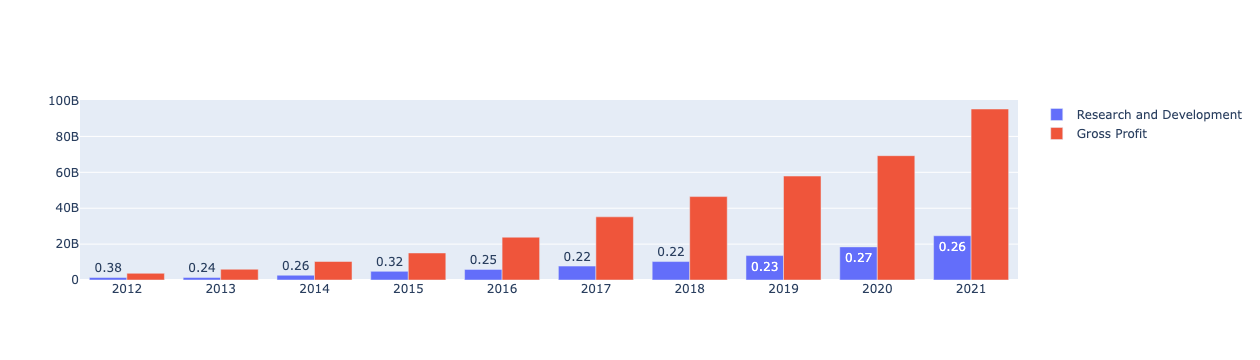

In [74]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Research and Development', x=rd_df_annual['calendarYear'], y=rd_df_annual['r&d'], text=rd_df_annual['r&d_gross_profit_ratio']),
    go.Bar(name='Gross Profit', x=rd_df_annual['calendarYear'], y=gross_profit_df_annual['gross_profit'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

With the 1st Quarter of 2019 as a reference for comparison, Research and Development at Meta has increased by over 200% by the end of the 3rd quarter in 2022. From 2021 to now, Meta has increased it's Research and Development Expense by 100%. Let's see how that compares to previous years... ~~~this might be wrong

Since the 2nd Quarter in 2021 Meta has ramped up it's 

even from an annual perspective growth in Research and Development Expenses has increased substantially in 2021 and will likely continue to grow as Meta pursues development of the Metaverse. This growth in R & D expense will decrease overall profitability of the company in the future, but is it a cause for concern?

### Earnings Before Interest Taxes Depreciation & Amortization (EBITDA) ###
Earnings Before Interest Taxes Depreciation & Amortization aka EBITDA is a measure of profitability by investors to help measure cash profits generated by a company's core operations by factoring out interest/tax expenses and Depreciation/Amortization. The idea here is that interest and tax payments are not related to the company's core operation so factoring out those expenses give us a better idea of how profitable Meta's core segments are. Depreciation & Amortization are also excluded because they represent non-cash expenses, meaning that no cash is being spent to incur those expenses, rather assets lose book value over time and are thus that lose is reflected through depreciation.

Let's take a look at Meta's EBITDA over the past 10 years and its growth year over year.

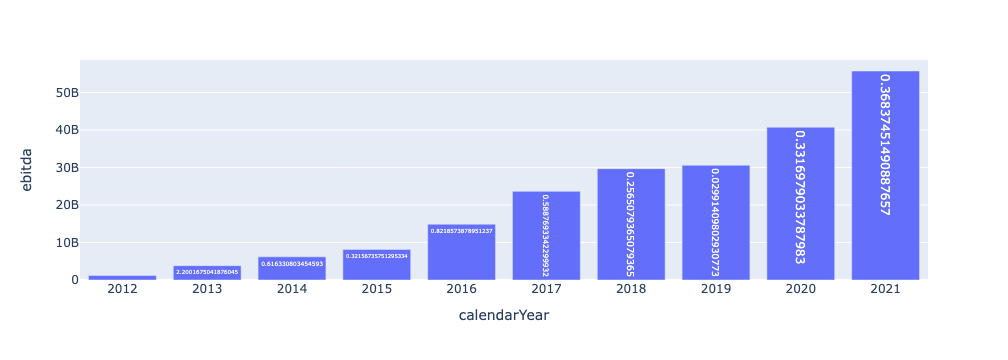

In [38]:
ebitda_df = pd.DataFrame(income_statement_df_annual['calendarYear'])
ebitda_df['ebitda'] = income_statement_df_annual['ebitda']
ebitda_df['ebitda_growth'] = (ebitda_df['ebitda'] - ebitda_df['ebitda'].shift(1)) / ebitda_df['ebitda'].shift(1)
ebitda_df['ebitda_ratio'] = income_statement_df_annual['ebitdaratio']

fig = px.bar(ebitda_df, x = 'calendarYear', y = 'ebitda', text='ebitda_growth')
fig.show()

### NetIncome ###

### Earnings Per Share ###

## Cash Flow Statement ##

### Operating Activities ###
### Investing Activities ###
### Financing Activities ###

## Enterprise Value ##
## DCF ##

## Other company comparables ##

## Summary, pricing ##

# Technical Analysis #

## Moving Average ##
## Momentum #

In [ ]:
Ok so percentage wise there definitly are years where Meta is has increased it's Research and Development by more than 100%. 

In [123]:
revenue = []
gross_profit = []
gross_profit_ratio = []
rd_expense = []
ebitda = []
ebitda_ratio = []
net_income = []
net_income_ratio = []
eps = []

for year in income_statement_annual:
    revenue.append(year['revenue'])
    gross_profit.append(year['grossProfit'])
    gross_profit_ratio.append(year['grossProfitRatio'])
    rd_expense.append(year['researchAndDevelopmentExpenses'])
    ebitda.append(year['ebitda'])
    ebitda_ratio.append(year['ebitdaratio'])
    net_income.append(year['netIncome'])
    net_income_ratio.append(year['netIncomeRatio'])
    eps.append(year['eps'])
    
    
income_statement_data = {
    'years': years,
    'revenue': revenue,
    'gross_profit': gross_profit,
    'gross_profit_ratio': gross_profit_ratio,
    'rd_expense': rd_expense,
    'ebitda': ebitda,
    'ebitda_ratio': ebitda_ratio,
    'net_income': net_income,
    'net_income_ratio': net_income_ratio,
    'eps': eps
}

income_statement_df = pd.DataFrame.from_dict(income_statement_data)
income_statement_df

NameError: name 'years' is not defined

NameError: name 'income_statement_df' is not defined

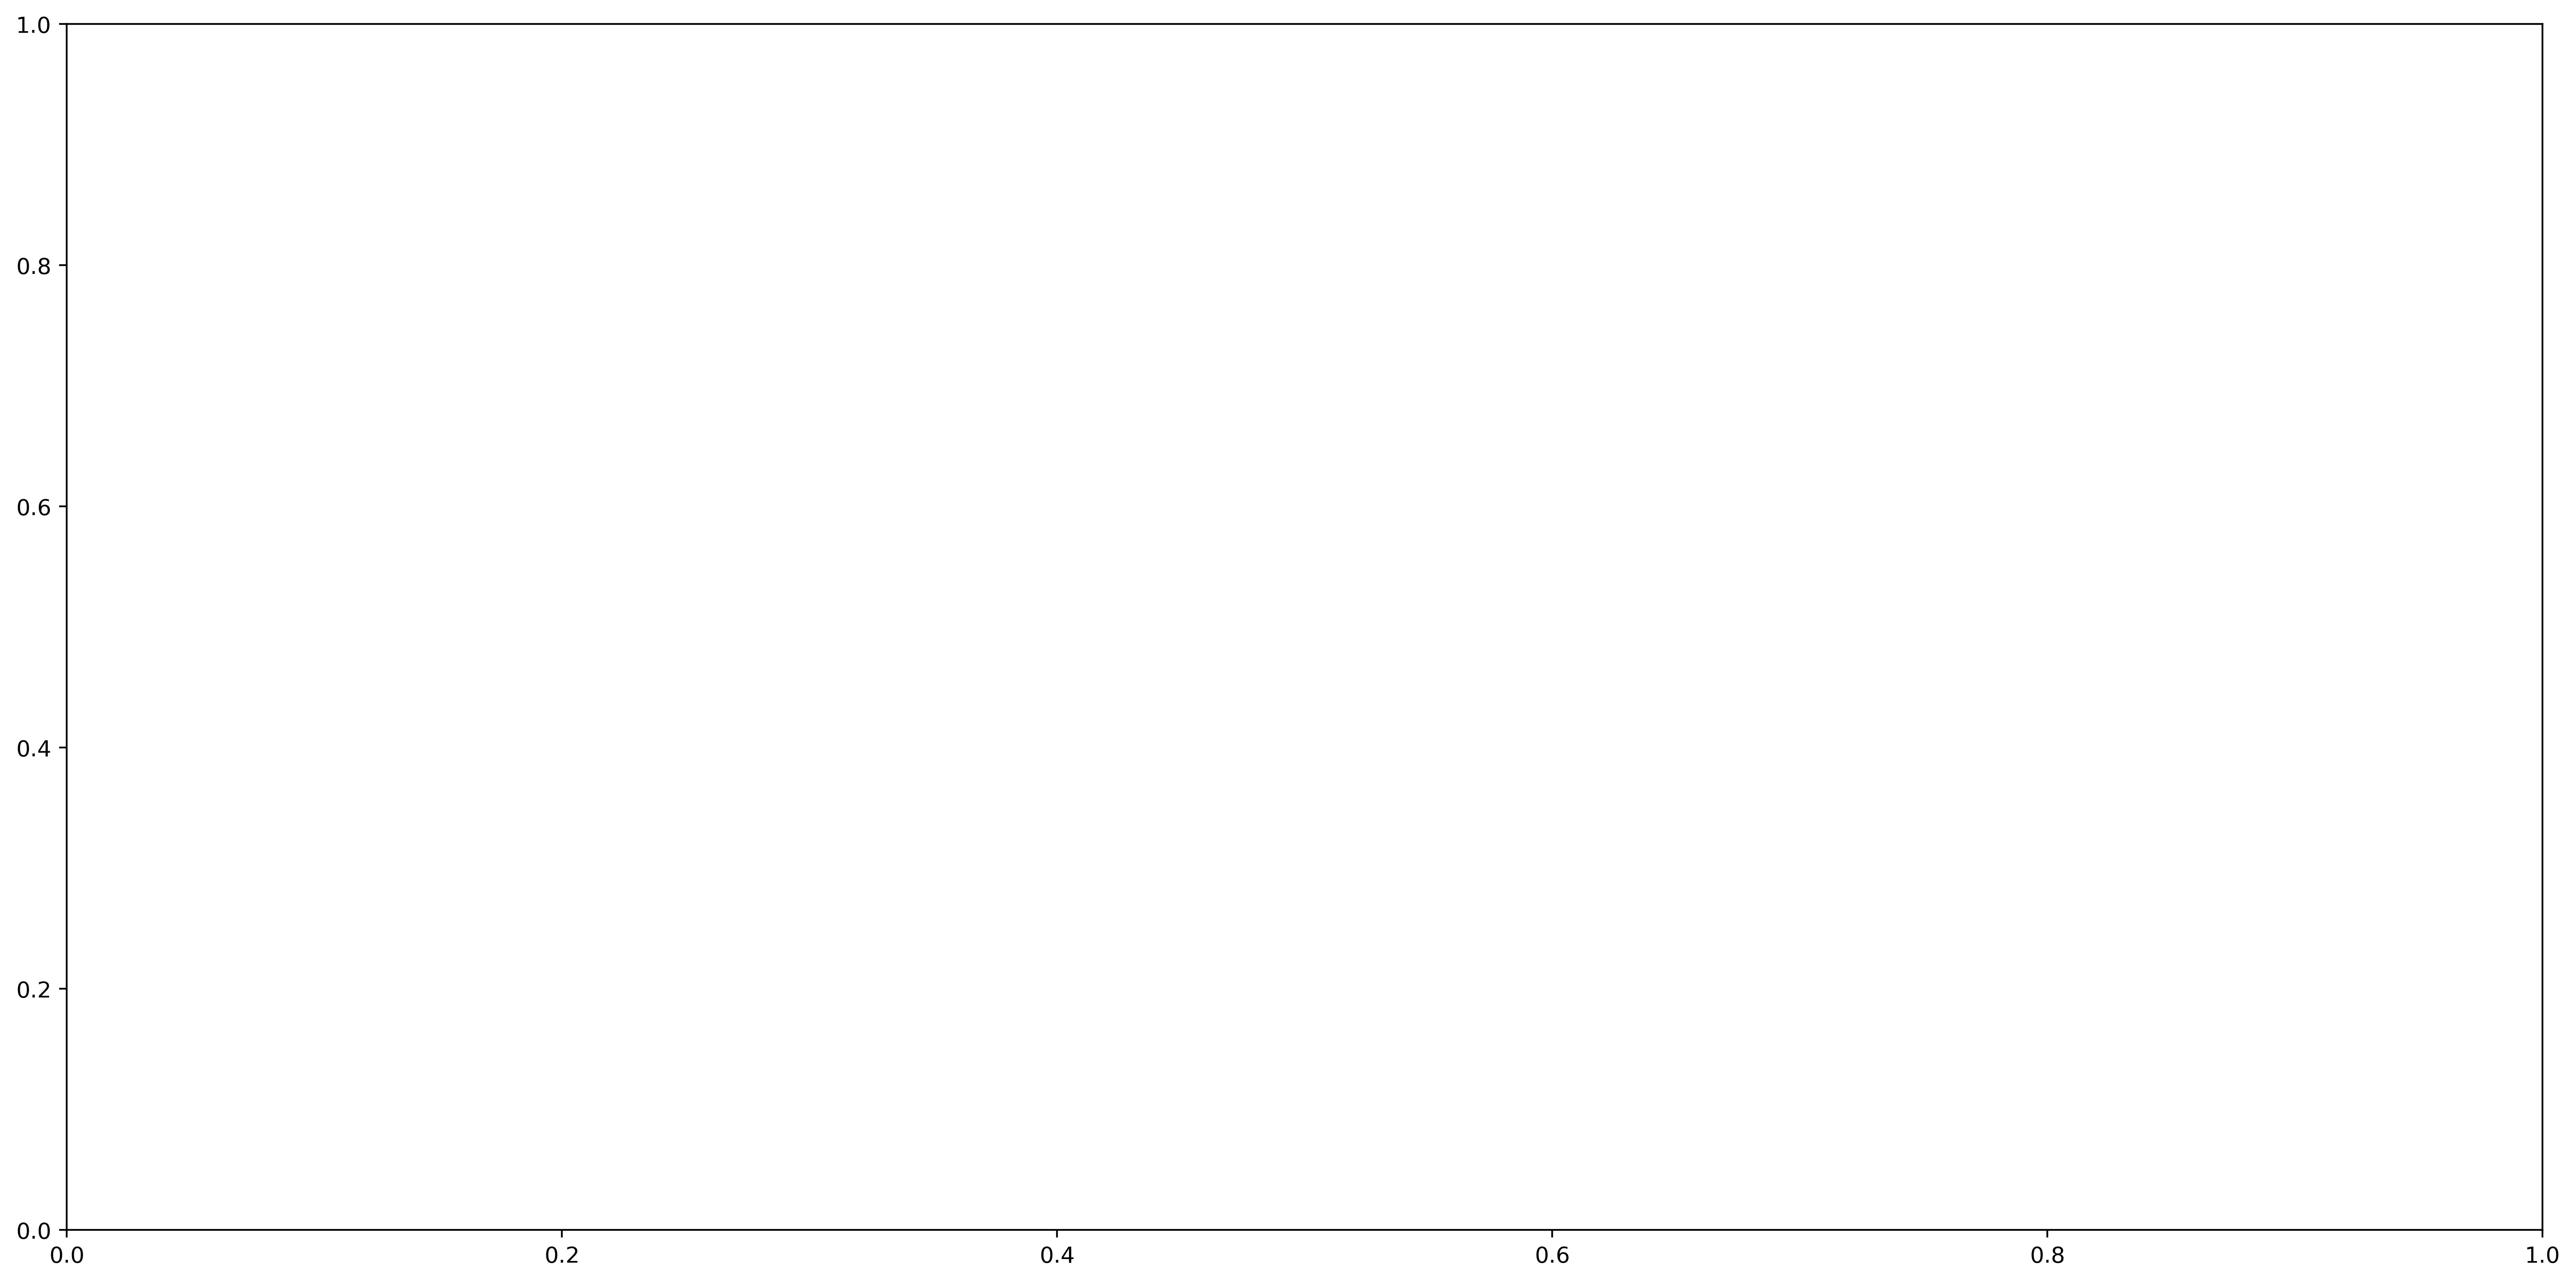

In [124]:
fig, ax = plt.subplots()
ax.plot('years', 'revenue', data=income_statement_df)
ax.plot('years', 'gross_profit', data=income_statement_df)
ax.plot('years', 'ebitda', data=income_statement_df)
ax.plot('years', 'net_income', data=income_statement_df)

In [ ]:
fig, ax = plt.subplots()
ax.plot('years', 'gross_profit_ratio', data=income_statement_df)

fig, ax = plt.subplots()
ax.plot('years', 'ebitda_ratio', data=income_statement_df)
ax.plot('years', 'net_income_ratio', data=income_statement_df)
ax.legend()

In [52]:
## pricing data
price = get_jsonparsed_data("https://financialmodelingprep.com/api/v3/historical-price-full/META?apikey=d4277832337026f8e79417143061c25c")

/tmp/ipykernel_50/266348974.py:26: DeprecationWarning:

cafile, capath and cadefault are deprecated, use a custom context instead.



In [53]:
import plotly.graph_objects as go
# len(price['historical'])
price

df = pd.DataFrame(price['historical'])
df

date        open        high         low       close    adjClose  \
0     2022-12-05  121.750000  124.670000  121.350000  122.430000  122.430000   
1     2022-12-02  117.830000  124.010000  117.620000  123.490000  123.490000   
2     2022-12-01  119.198000  121.200000  118.410000  120.440000  120.440000   
3     2022-11-30  109.540000  118.160000  109.380000  118.100000  118.100000   
4     2022-11-29  109.540000  110.940000  108.545000  109.460000  109.460000   
...          ...         ...         ...         ...         ...         ...   
1253  2017-12-12  178.600006  179.179993  176.600006  176.960007  176.960007   
1254  2017-12-11  179.300003  180.220001  178.800003  179.039993  179.039993   
1255  2017-12-08  181.529999  182.279999  178.740097  179.000000  179.000000   
1256  2017-12-07  175.800003  180.389999  175.800003  180.139999  180.139999   
1257  2017-12-06  172.500000  176.770004  171.899994  176.059998  176.059998   

          volume  unadjustedVolume   change  changePercent       vwap  \
0     35432496.0        35432496.0  0.68000          0.559  122.81667   
1     39812950.0        39812950.0  5.66000          4.804  121.70667   
2     35551142.0        35551142.0  1.24200          1.042  120.01667   
3     43351935.0        43351935.0  8.56000          7.814  115.21333   
4     23901352.0        23901352.0 -0.08000         -0.073  109.64833   
...          ...               ...      ...            ...        ...   
1253  16854098.0        16854098.0 -1.64000         -0.918  177.58000   
1254  13168575.0        13168575.0 -0.26001         -0.145  179.35333   
1255  19883764.0        19883764.0 -2.53000         -1.394  180.00670   
1256  20404533.0        20404533.0  4.34000          2.469  178.77667   
1257  20255846.0        20255846.0  3.56000          2.064  174.91000   

                label  changeOverTime  
0     December 05, 22         0.00559  
1     December 02, 22         0.04804  
2     December 01, 22         0.01042  
3     November 30, 22         0.07814  
4     November 29, 22        -0.00073  
...               ...             ...  
1253  December 12, 17        -0.00918  
1254  December 11, 17        -0.00145  
1255  December 08, 17        -0.01394  
1256  December 07, 17         0.02469  
1257  December 06, 17         0.02064  

[1258 rows x 13 columns]

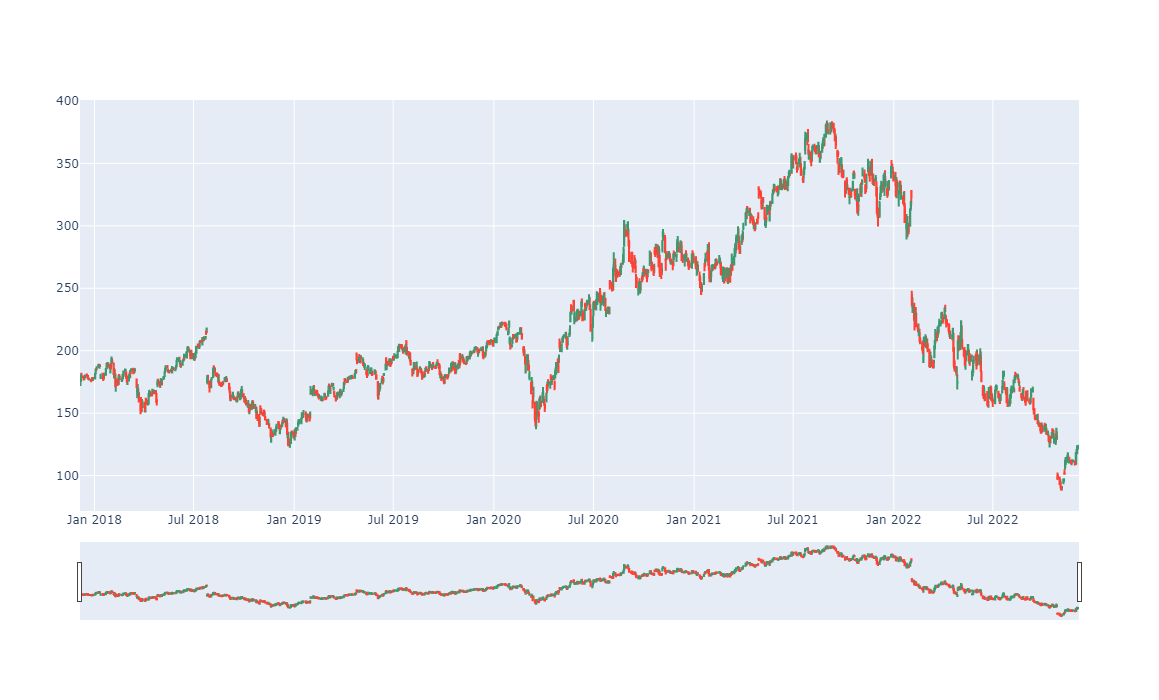

In [61]:
import plotly.express as px

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])
                      
                     ])

fig.update_layout(
    autosize=False,
    width=1000,
    height= 700,
)

fig.show()


In [ ]:
## get Cash From Operating Acitivites
## net Change in cash
## Operating Cash flow
## freeCashFlow


total_years = len(cash_statement_annual)

date = []
years = []
cash_from_operating_activities = []
net_change_in_cash = []
free_cash_flow = []
operating_cash_flow = []

for year in cash_statement_annual:
    date.append(year['date'])
    years.append(year['calendarYear'])
    cash_from_operating_activities.append(year['netCashProvidedByOperatingActivities'])
    net_change_in_cash.append(year['netChangeInCash'])
    free_cash_flow.append(year['freeCashFlow'])


cash_flow = {
    'years':years,
    'free_cash_flow':free_cash_flow,
    'net_change_in_cash':net_change_in_cash,
    'cash_from_operating_activities':cash_from_operating_activities
}
print(cash_flow)